In [1]:
import urllib.request, json
from datetime import datetime, timedelta
import matplotlib.pylab as plt
import matplotlib.dates as mdates
from statsmodels.tsa.api import ExponentialSmoothing

request = urllib.request.urlopen("https://covid.ourworldindata.org/data/owid-covid-data.json")
data = json.load(request)

def plot_new_cases_per_million_from_last_n_days(country, smoothed, dayRange):
    full_data = data[country]["data"]
    full_data_in_range = list(filter(lambda x: datetime.strptime(x["date"], "%Y-%m-%d") > (datetime.today() - timedelta(days=dayRange)), full_data))

    daterange = list(map(lambda x: x["date"], full_data_in_range))
    new_cases_per_million = list(map(lambda x: x["new_cases_per_million"], full_data_in_range))
    
    exp = ExponentialSmoothing(new_cases_per_million) 
    exp_model = exp.fit(smoothing_level=0.1) 
    new_cases_per_million_smoothed = exp_model.fittedvalues
    
    if smoothed == True:
        graph_data_dict = dict(zip(daterange, new_cases_per_million_smoothed))
    else:
        graph_data_dict = dict(zip(daterange, new_cases_per_million))

    plot_list = [(k, v) for k, v in graph_data_dict.items()]
    x, y = zip(*plot_list)

    # Set the locator
    locator = mdates.MonthLocator()  # every month
    # Specify the format - %b gives us Jan, Feb...
    fmt = mdates.DateFormatter('%b')

    plt.plot(x, y)
    
    plt.xlabel('Date')
    
    if smoothed == True:
        plt.ylabel('New cases per 1 million smoothed')
    else:
        plt.ylabel('New cases per 1 million')    
    
    X = plt.gca().xaxis

    X.set_major_locator(locator)
    X.set_major_formatter(fmt)
    
    plt.title(country)
    plt.ylim([0, 1000])

    plt.show()
    # dać wygładzone i surowe dane na jednym wykresie
    # dowiedzieć się więcej o Holt-Winters

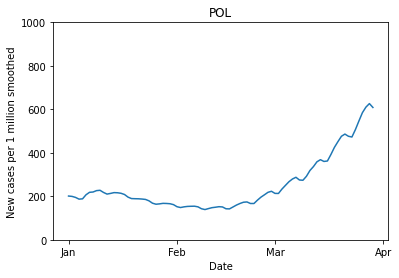

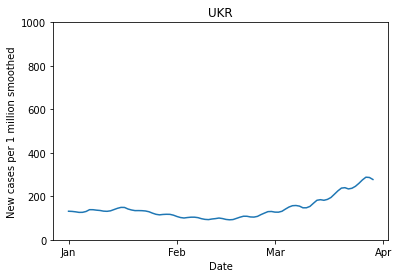

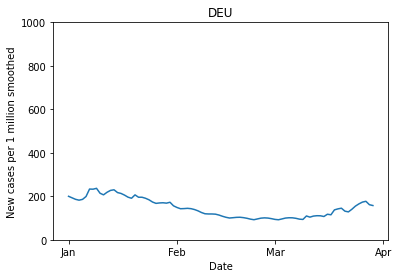

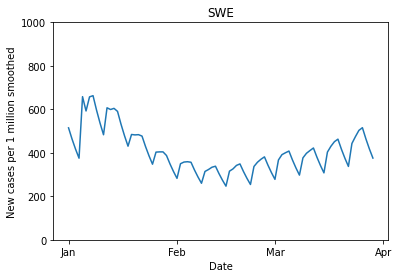

In [3]:
plot_new_cases_per_million_from_last_n_days("POL", True, 90)

plot_new_cases_per_million_from_last_n_days("UKR", True, 90)

plot_new_cases_per_million_from_last_n_days("DEU", True, 90)

plot_new_cases_per_million_from_last_n_days("SWE", True, 90)